In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
import yfinance as yf
import tensorflow as tf
import math
import datetime
import plotly
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

import time #helper libraries
import matplotlib.pyplot as plt
from numpy import newaxis
%matplotlib inline

In [3]:
data = yf.download('ETH-USD')
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100


In [4]:
df = data.filter(['Close'])
dataset = df.values

In [5]:
training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

2123

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[5.60734562e-04],
       [7.64097019e-05],
       [6.40717283e-05],
       ...,
       [7.98656539e-01],
       [7.09781558e-01],
       [6.90799549e-01]])

In [7]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape



[array([5.60734562e-04, 7.64097019e-05, 6.40717283e-05, 6.56433571e-05,
       1.51869137e-04, 1.87754560e-04, 3.34153547e-04, 3.34201536e-04,
       3.00861532e-04, 2.71384057e-04, 1.84436618e-04, 1.56472958e-04,
       1.97691541e-04, 2.47126974e-04, 2.30422181e-04, 2.26569261e-04,
       2.20178101e-04, 1.91072473e-04, 1.69221674e-04, 1.73969464e-04,
       1.71023370e-04, 1.81502564e-04, 1.79384160e-04, 2.12184382e-04,
       2.21533591e-04, 2.19942987e-04, 2.06311440e-04, 1.99147786e-04,
       2.01422113e-04, 2.16872171e-04, 2.06560940e-04, 1.94762263e-04,
       1.93749849e-04, 1.85132352e-04, 1.75358530e-04, 1.31505270e-04,
       1.44883026e-04, 1.20235607e-04, 1.05749715e-04, 1.22252512e-04,
       1.13319536e-04, 1.05416005e-04, 1.00486867e-04, 1.07373652e-04,
       1.20821448e-04, 1.16167721e-04, 1.12029066e-04, 1.10016237e-04,
       9.08725570e-05, 7.23067964e-05, 8.42400621e-05, 6.86160632e-05,
       3.55200392e-05, 5.42952321e-05, 7.28876185e-05, 6.12691162e-05,
     

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=50)



Epoch 1/50
33/33 [==============================] - 8s 150ms/step - loss: 0.0016
Epoch 2/50
33/33 [==============================] - 5s 152ms/step - loss: 5.7152e-04
Epoch 3/50
33/33 [==============================] - 5s 156ms/step - loss: 6.1187e-04
Epoch 4/50
33/33 [==============================] - 5s 154ms/step - loss: 4.6150e-04
Epoch 5/50
33/33 [==============================] - 5s 155ms/step - loss: 5.0299e-04
Epoch 6/50
33/33 [==============================] - 5s 154ms/step - loss: 4.1212e-04
Epoch 7/50
33/33 [==============================] - 5s 154ms/step - loss: 3.1880e-04
Epoch 8/50
33/33 [==============================] - 5s 155ms/step - loss: 2.9345e-04
Epoch 9/50
33/33 [==============================] - 5s 155ms/step - loss: 2.5652e-04
Epoch 10/50
33/33 [==============================] - 5s 154ms/step - loss: 3.3827e-04
Epoch 11/50
33/33 [==============================] - 5s 154ms/step - loss: 2.4501e-04
Epoch 12/50
33/33 [==============================] - 5s 153ms/step 

In [27]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

177.19435718021893

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



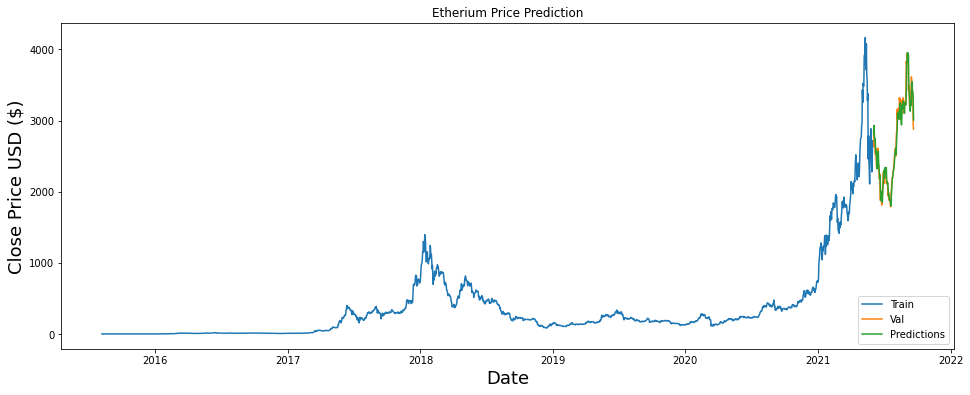

In [10]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Etherium Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [11]:
valid[['Close','Predictions']]

,Close,Predictions
Date,,
2021-06-03,2855.126465,2806.658447
2021-06-04,2688.195068,2932.256836
2021-06-05,2630.576904,2816.034424
2021-06-06,2715.092773,2712.164307
2021-06-07,2590.263184,2746.471924
...,...,...
2021-09-17,3398.538818,3546.119141
2021-09-18,3432.018311,3399.607178
2021-09-19,3329.447998,3398.307861


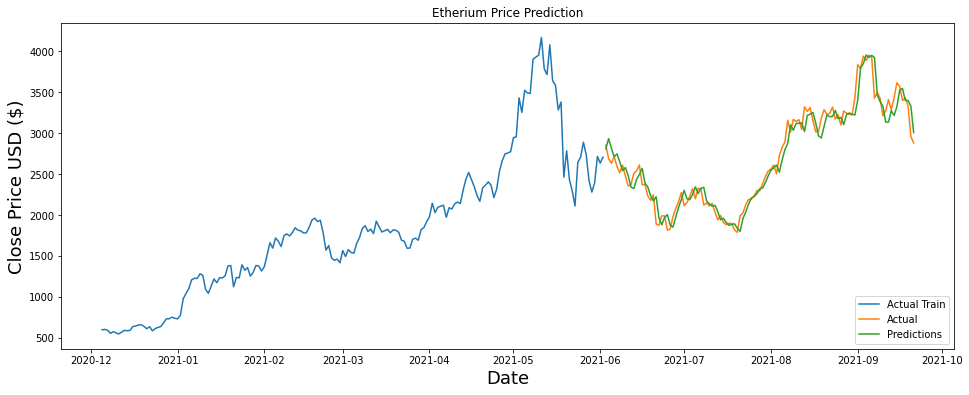

In [12]:
plt.figure(figsize=(16,6))
plt.title('Etherium Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'][-180:])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()